<a href="https://colab.research.google.com/github/Yassine-oujarrar/causal-inference-with-dowhy/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 SDD1004


*   Yassine Oujarrar
*   CODE PERMA : OUJY81110100

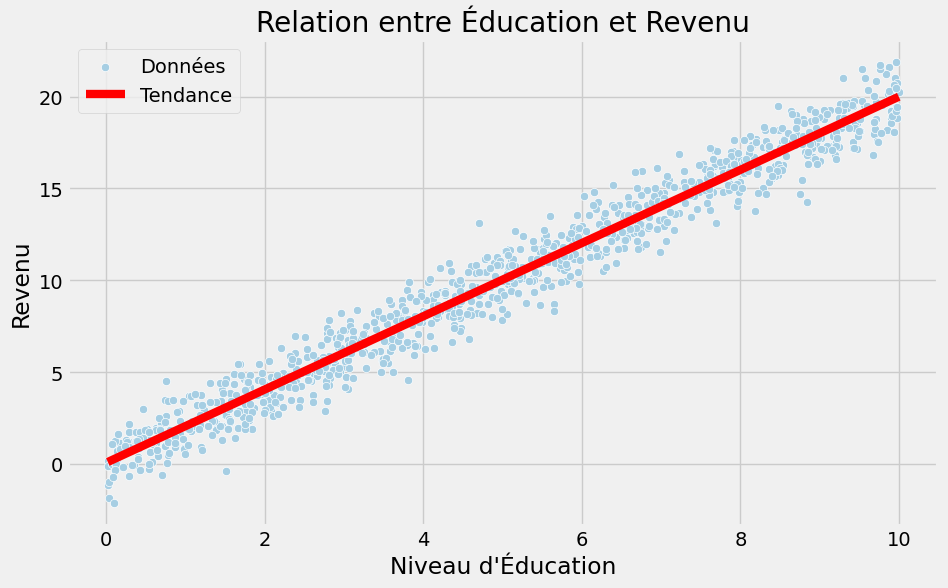

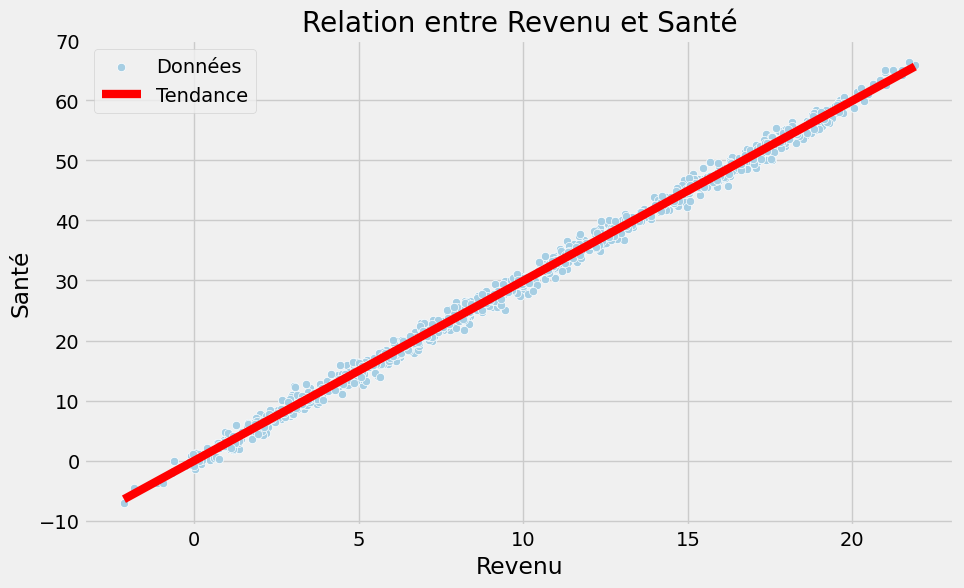

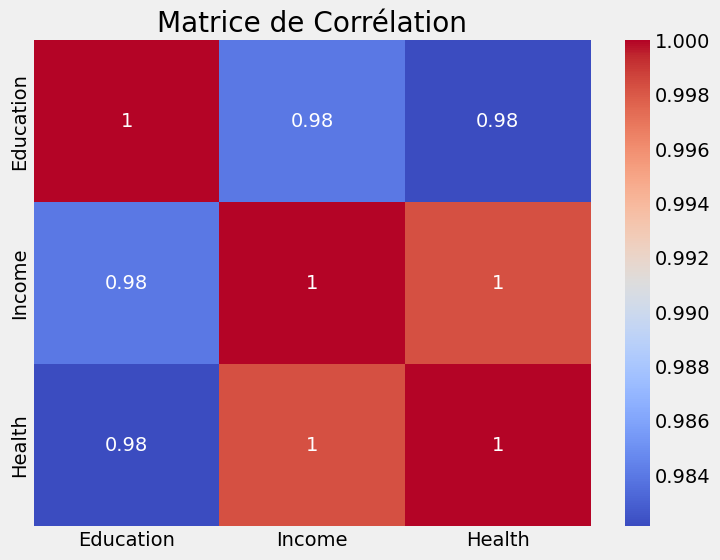

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# générer les données
n_samples = 1000
education = np.random.uniform(0, 10, size=n_samples)  # Niveau d'éducation (0-10)
income = 2 * education + np.random.normal(0, 1, size=n_samples)  # Revenu dépend de l'éducation
health = 3 * income + np.random.normal(0, 1, size=n_samples)  # Santé dépend du revenu

# combinaison en DataFrame
data = pd.DataFrame({
    'Education': education,
    'Income': income,
    'Health': health
})

# graphique 1 : Éducation vs Revenu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education', y='Income', data=data, label="Données")
sns.regplot(x='Education', y='Income', data=data, scatter=False, color='red', label="Tendance")  # Courbe de tendance
plt.title('Relation entre Éducation et Revenu')
plt.xlabel('Niveau d\'Éducation')
plt.ylabel('Revenu')
plt.legend()
plt.show()

# graphique 2 : Revenu vs Santé
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Health', data=data, label="Données")
sns.regplot(x='Income', y='Health', data=data, scatter=False, color='red', label="Tendance")  # Courbe de tendance
plt.title('Relation entre Revenu et Santé')
plt.xlabel('Revenu')
plt.ylabel('Santé')
plt.legend()
plt.show()

# matrice de corrélation
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()


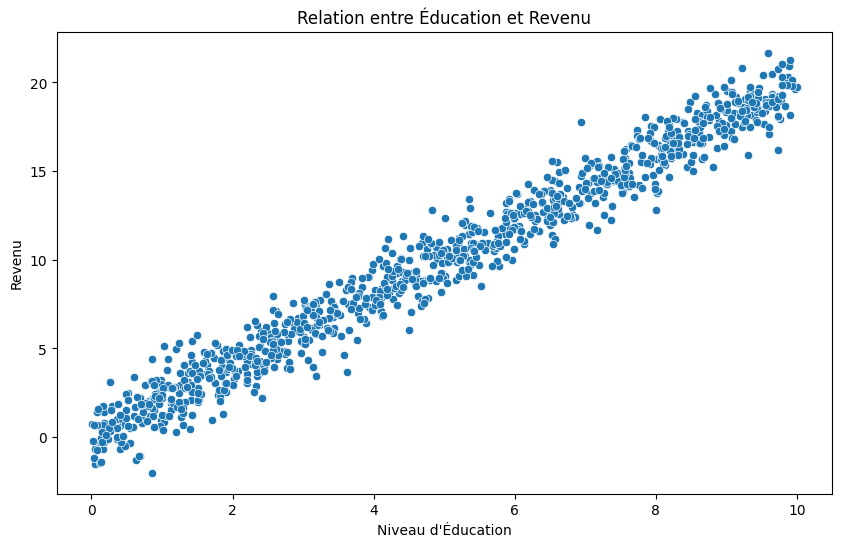

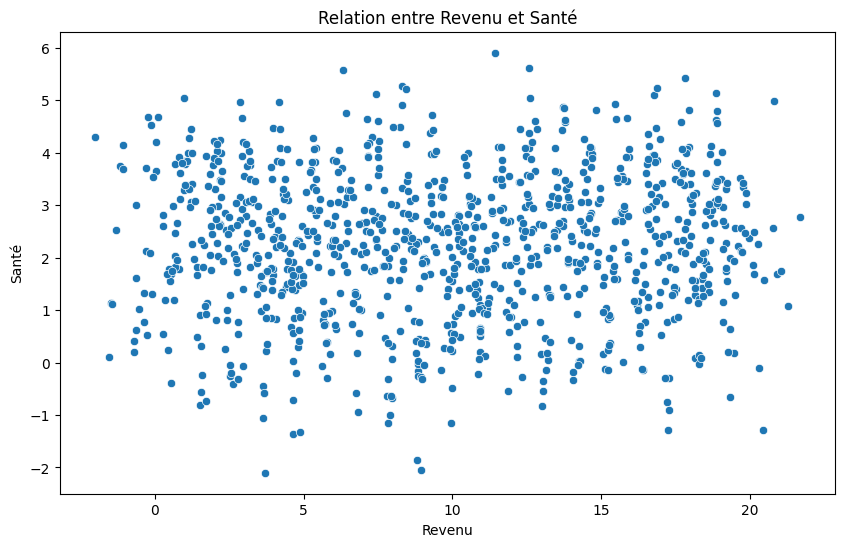

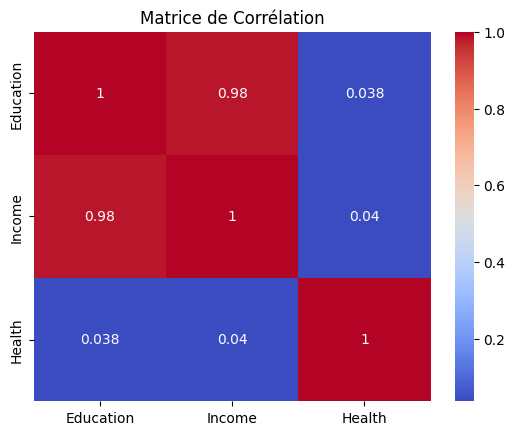

In [ ]:
n_samples = 1000
education = np.random.uniform(0, 10, size=n_samples)  # Niveau d'éducation (0-10)
income = 2 * education + np.random.normal(0, 1, size=n_samples)  # Revenu dépend de l'éducation
health = 3 * abs(np.cos(3 * income)) + 0.5 * abs(np.cos(education)) + np.random.normal(0, 1, size=n_samples)

# combinaison en DataFrame
data = pd.DataFrame({
    'Education': education,
    'Income': income,
    'Health': health
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education', y='Income', data=data)
plt.title('Relation entre Éducation et Revenu')
plt.xlabel('Niveau d\'Éducation')
plt.ylabel('Revenu')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Health', data=data)
plt.title('Relation entre Revenu et Santé')
plt.xlabel('Revenu')
plt.ylabel('Santé')
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

Explication graphe 1: Ce graphique montre la relation entre le niveau d'éducation et le revenu. Comme dans la première question, on s'attend à une tendance linéaire positive, car le revenu est directement proportionnel à l'éducation.

Explication graph 2 : Ce graphique illustre la relation entre le revenu et la santé. Contrairement à la première question, la santé est maintenant calculée avec une fonction non linéaire (cosinus), ce qui introduit une relation plus complexe entre le revenu et la santé.

Explication graph 3 : Cette heatmap montre les coefficients de corrélation entre les variables. On vois la corrélation est plus faibles entre le revenu et la santé puis Education et santé en raison de la relation non linéaire introduite.


Dans la première question, la santé était une fonction linéaire du revenu, ce qui entraînait des relations linéaires fortes et des corrélations élevées entre les variables. Dans cette deuxième question, la santé est calculée en utilisant des fonctions trigonométriques (cosinus), ce qui introduit une relation non linéaire entre le revenu et la santé. Cela se traduit par des visualisations plus complexes et des coefficients de corrélation plus faibles entre le revenu et la santé. Cette différence montre comment la nature des relations entre les variables peut affecter les visualisations et les analyses de données.


# **NOTEARS**
(Non-combinatorial Optimization via Trace Exponential and Augmented lagRangian for Structure learning) est un algorithme utilisé pour apprendre la structure de graphes causaux à partir de données observées. Contrairement aux méthodes traditionnelles qui explorent de manière combinatoire l'espace des graphes possibles, NOTEARS utilise une approche basée sur l'optimisation continue pour trouver la structure du graphe.

Pourquoi NOTEARS n'est pas capable de trouver les relations entre les données de la question 2

  - Relations non linéaires : NOTEARS est conçu pour détecter des relations linéaires entre les variables. Dans la question 2, la santé est une fonction non linéaire du revenu et de l'éducation (utilisant des fonctions cosinus). NOTEARS peut ne pas être capable de capturer ces relations non linéaires complexes.

  - Hypothèses de l'algorithme : NOTEARS suppose que les relations entre les variables peuvent être modélisées de manière linéaire. Cette hypothèse est violée dans les données de la question 2, ce qui limite la capacité de l'algorithme à identifier correctement les dépendances.

  - Limitations de l'optimisation continue : L'approche d'optimisation continue de NOTEARS peut ne pas être adaptée pour explorer des relations non linéaires complexes, car elle repose sur des gradients et des hessiens qui sont plus difficiles à calculer et à interpréter dans un contexte non linéaire.

# **Observations et limitations de NOTEARS dans ce contexte**
  - Limitation à la linéarité : NOTEARS est limité aux relations linéaires. Pour des données avec des relations non linéaires, comme celles de la question 2, il peut ne pas être efficace.

  - Complexité des données : Lorsque les relations entre les variables sont complexes et non linéaires, des méthodes plus sophistiquées, comme les réseaux de neurones ou les modèles de graphes causaux non linéaires, peuvent être nécessaires.

  - Interprétabilité : Même si NOTEARS peut fournir une structure de graphe, l'interprétation des résultats peut être difficile si les relations sous-jacentes ne sont pas linéaires.

  - Performance : Dans des scénarios avec des relations non linéaires, NOTEARS peut ne pas performer aussi bien que des méthodes conçues spécifiquement pour capturer des relations non linéaires.

# **Fonctionnement de l'algorithme DoWhy**
L'algorithme DoWhy est une bibliothèque Python qui permet d'analyser des relations causales dans les données. Il suit une approche en trois étapes principales :




 1. **Modélisation causale (Causal Graph)**:


Tout d'abord, DoWhy construit un modèle causal qui représente les relations entre les variables de manière graphique. Ce modèle est souvent exprimé sous forme de DAG (Directed Acyclic Graph), où les nœuds représentent les variables et les arcs dirigés montrent les relations causales entre elles.
Par exemple, dans notre code, nous avons défini que l'éducation (Education) a un impact direct sur la santé (Health), et que le revenu (Income) est une cause commune qui influence à la fois l'éducation et la santé.



2.   **Identification de l'effet causal (Identification) :**



Ensuite, DoWhy identifie l'effet causal qu'on souhaite estimer en fonction du modèle causal défini. Cela consiste à identifier le bon estimand (c'est-à-dire, le type d'effet causal à estimer), tel que l'Average Treatment Effect (ATE), l'Average Treatment Effect on the Treated (ATT), ou d'autres effets.
Dans notre exemple, l'algorithme identifie l'effet causal de l'éducation sur la santé en utilisant la méthode backdoor. Cela signifie qu'il va contrôler les variables confondantes comme le revenu pour isoler l'effet direct de l'éducation sur la santé.



3.   **Estimation de l'effet causal (Estimation) :**


Une fois l'effet causal identifié, DoWhy utilise différentes méthodes statistiques pour estimer l'effet causal. Dans notre code, nous utilisons la régression linéaire pour estimer l'effet causal de l'éducation sur la santé, en contrôlant pour le revenu. L'algorithme applique la méthode backdoor avec la régression linéaire pour estimer cet effet.
L'estimation obtenue est un nombre qui représente la variation moyenne de la santé pour un changement dans le niveau d'éducation, en prenant en compte l'impact du revenu.


 *Résumé du processus :
Définition d'un modèle causal (Causal Graph).
Identification de l'effet causal (par exemple, ATE).
Estimation de l'effet causal à l'aide de méthodes statistiques (comme la régression linéaire).
Dans notre cas, l'algorithme estime que l'effet de l'éducation sur la santé est négatif (environ -0.08). Cela signifie qu'augmenter le niveau d'éducation, selon les données et relations causales simulées, pourrait avoir un effet défavorable sur la santé*.

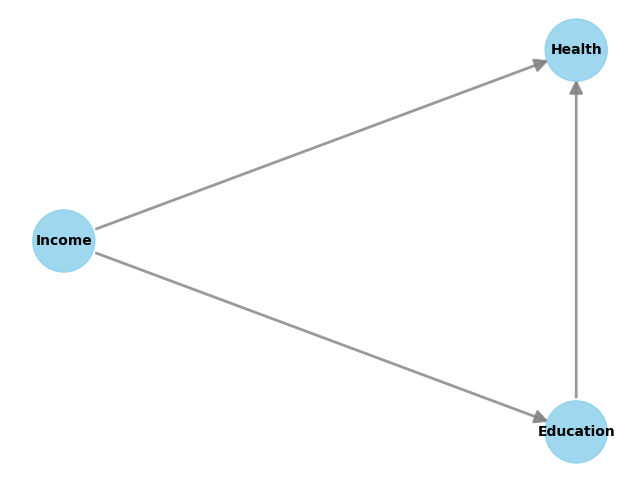

Identified effect:  Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Health|Income])
d[Education]                  
Estimand assumption 1, Unconfoundedness: If U→{Education} and U→Health then P(Health|Education,Income,U) = P(Health|Education,Income)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal effect estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Health|Income])
d[Education]                  
Estimand assumption 1, Unconfoundedness: If U→{Education} and U→Health then P(Health|Education,Income,U) = P(Health|Education,Income)

## Realized estimand
b: Health~Education+Income
Target units: ate

## Estimate
Mean value: -0.134217

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [ ]:
import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd

# générer les données
n_samples = 1000
education = np.random.uniform(0, 10, size=n_samples)
income = 2 * education + np.random.normal(0, 1, size=n_samples)
health = 3 * abs(np.cos(3 * income)) + 0.5 * abs(np.cos(education)) + np.random.normal(0, 1, size=n_samples)

# créer un DataFrame
data = pd.DataFrame({
    'Education': education,
    'Income': income,
    'Health': health
})

# créer un modèle causal avec DoWhy
model = CausalModel(
    data=data,
    treatment="Education",
    outcome="Health",
    common_causes=["Income"]
)

# identifier le graphe causal
model.view_model()

# identifier l'effet causal en utilisant la méthode 'backdoor' avec la régression linéaire
identified_estimand = model.identify_effect()
print("Identified effect: ", identified_estimand)

# estimer l'effet causal avec régression linéaire
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal effect estimate: ", causal_estimate)



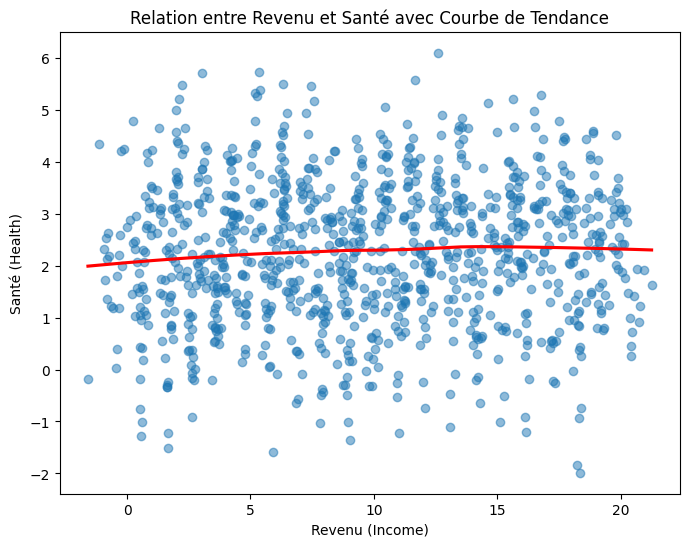

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# tracer la relation entre revenu et santé avec une courbe de tendance non linéaire
plt.figure(figsize=(8, 6))
sns.regplot(x=data["Income"], y=data["Health"], lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Revenu (Income)")
plt.ylabel("Santé (Health)")
plt.title("Relation entre Revenu et Santé avec Courbe de Tendance")
plt.show()




# 1.   **DoWhy :**


*   DoWhy repose sur un modèle causal défini a priori sous forme de graphe dirigé acyclique (DAG).
*   L'estimation de l'effet causal utilise la méthode du backdoor, qui ajuste les variables de confusion pour éliminer les biais.

*   DoWhy est plus robuste pour des relations non linéaires, comme celles présentes dans notre jeu de données, car il peut utiliser des estimateurs non paramétriques.








# 2.   **NOTEARS :**


*   NOTEARS est un algorithme de découverte causale qui apprend la structure du graphe causal directement à partir des données, sans qu'on ait besoin de définir un DAG au préalable.
*   Il repose sur une formulation linéaire, ce qui signifie qu'il ne peut pas bien gérer les relations causales non linéaires.
*   Dans notre jeu de données, la variable Health dépend d’une combinaison non linéaire du revenu et de l’éducation (fonction cosinus). Par conséquent, NOTEARS pourrait mal capturer ces relations, contrairement à DoWhy qui peut fonctionner avec des méthodes non paramétriques.







#  **Pourquoi DoWhy est mieux adapté ?**

*   Il gère les relations non linéaires contrairement à NOTEARS.
*    Il s’appuie sur un DAG défini par l’utilisateur, garantissant une meilleure interprétation des relations causales.
*    Il suit une approche complète d’inférence causale, incluant identification, estimation et validation.
*   Si les relations causales sont complexes et non linéaires, comme dans notre dataset, DoWhy est le meilleur choix !







